# Sentence Pairs -

To detect whether two given sentences are **contradictory** or **non - contradictory**.
### Data Set - 
The dataset contains 4500 labeled rows having 2 sentences and their respective label in each row. 

---

Tags - Python, NLP, Text Classification

### Importing the important libraries

In [10]:
# Linear Algebra and Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Loading the dataset
df = pd.read_csv('./data/dataset.txt', header = None, sep = "\t").drop(3, axis = 1)

### Exploratory Data Analysis

In [12]:
# Renaming the columns
df.columns = ['id', 'statement_1', 'statement_2', 'label']

In [13]:
# Checking the value counts
df.label.value_counts()

NEUTRAL          2536
ENTAILMENT       1299
CONTRADICTION     665
Name: label, dtype: int64

In [14]:
# Overview of data
df.head()

,id,statement_1,statement_2,label
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,NEUTRAL
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,NEUTRAL
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,ENTAILMENT
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,NEUTRAL
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,NEUTRAL


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           4500 non-null   int64 
 1   statement_1  4500 non-null   object
 2   statement_2  4500 non-null   object
 3   label        4500 non-null   object
dtypes: int64(1), object(3)
memory usage: 140.8+ KB


In [16]:
def label_encoding(df):
    """
    This function will rename the data to be contradiction and non-contradiction and
    then encode the labels into binary.
    param df: data containing 3 columns.
    """
    # Changing the labels 'neutral' and 'entailment' to 'non-contradiction'
    df.loc[(df.label == 'NEUTRAL') | (df.label == 'ENTAILMENT'), 'label'] = 'NON-CONTRADICTION'
    
    # Dropping the ID column
    df.drop('id', axis=1, inplace=True)

    # Changing labels to 0 / 1
    df.loc[(df.label == 'NON-CONTRADICTION'), 'label'] = 0
    df.loc[(df.label == 'CONTRADICTION'), 'label'] = 1
    
    return df

In [17]:
df_labeled = label_encoding(df)

In [18]:
print('Total Number of Statements: {}'.format(len(df)))
print('Contradiction pairs: {}%'.format(round(df['label'].mean() * 100, 2)))

# Finding the total, unique and repeated number of statements
total_statements = pd.Series(df['statement_1'].tolist() + df['statement_2'].tolist())
unique_statements = len(np.unique(total_statements))
repeated_statements = np.sum(total_statements.value_counts() > 1)

print('Total number of unique statements: {}'.format(unique_statements))
print('Number of statements appearing more than once: {}'.format(repeated_statements))
print('Max number of times a single statement is repeated: {}'.format(max(total_statements.value_counts())))

Total Number of Statements: 4500
Contradiction pairs: 14.78%
Total number of unique statements: 4802
Number of statements appearing more than once: 2445
Max number of times a single statement is repeated: 31


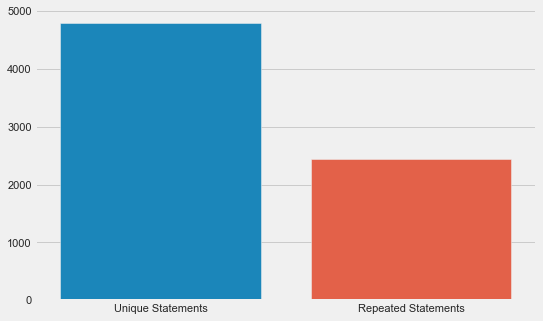

In [19]:
sns.barplot(x = ["Unique Statements", "Repeated Statements"], y = [unique_statements, repeated_statements]);

In [20]:
total_statements = pd.DataFrame({'statements': total_statements})
total_statements['num_of_words'] = total_statements['statements'].apply(lambda x: len(str(x).split()))
total_statements.head()

,statements,num_of_words
0,A group of kids is playing in a yard and an ol...,18
1,A group of children is playing in the house an...,18
2,The young boys are playing outdoors and the ma...,12
3,The kids are playing outdoors near a man with ...,11
4,The young boys are playing outdoors and the ma...,12


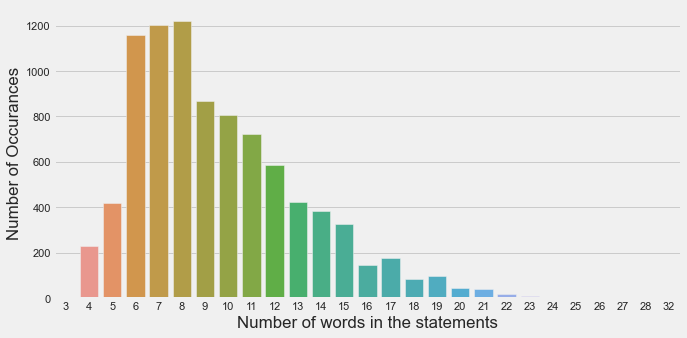

In [21]:
count_words = total_statements.num_of_words.value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(count_words.index, count_words.values)
plt.ylabel('Number of Occurances')
plt.xlabel('Number of words in the statements')
plt.show()

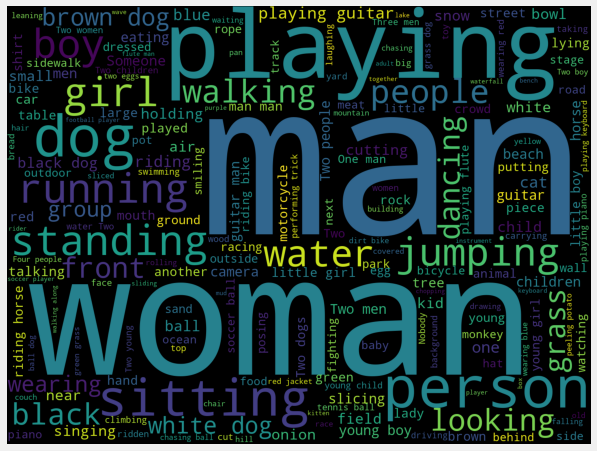

In [22]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(total_statements['statements'].astype(str)))
plt.figure(figsize=(10, 7.5))
plt.imshow(cloud)
plt.axis('off');

# Feature Extraction
We will use word2vec model to make infromative vectors before fitting our dataset into the model.

In [23]:
# import Natural Language Toolkit
import nltk
# Import stop words list
from nltk.corpus import stopwords
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer
# Import Lemmatizer
from nltk.stem import WordNetLemmatizer
# Import Stemmer
from nltk.stem.porter import PorterStemmer
# Import Gensim to use word2vec
import gensim
# Import regex, string
import re, string
from bs4 import BeautifulSoup

In [24]:
df_labeled.head(10)

,statement_1,statement_2,label
0,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,0
1,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,0
2,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,0
3,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,0
4,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,0
...,...,...,...
4495,A door is being opened by a man,A bald man in a band is playing guitar in the ...,0
4496,Someone is boiling okra in a pot,The man is not playing the drums,0
4497,The man is singing heartily and playing the gu...,A bicyclist is holding a bike over his head in...,0
4498,A man in blue has a yellow ball in the mitt,A man is jumping rope outside,0


In [25]:
def clean_text(df_column):
    """
    This function will clean the text data to fit it
    in the word2vec model. 
    param df_column: Pandas Series model that contain the text data
    """
    clean = []
    
    for doc in df_column:
        x = doc.lower()                     #lowert he case
        x = BeautifulSoup(x, 'lxml').text   #html tag removal
        x = re.sub('[^A-Za-z0-9]+', ' ', x) #separate words by space
        clean.append(x)
    return clean

In [72]:
df_clean = df_labeled.copy()

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_clean[['statement_1', 'statement_2']], df_clean['label'], 
                                                    test_size=.2, random_state=123, stratify=df_clean['label'])


X_train['statement_1'] = clean_text(X_train['statement_1'])
X_train['statement_2'] = clean_text(X_train['statement_2'])
X_train.head()

,statement_1,statement_2
4486,the military officer is shouting at the recruits,a rollerblader is performing a trick on a ramp
1692,the man is riding a horse by a creek,the man is riding a horse by a stream
2122,a boy is playing a guitar,a boy is not playing a guitar
2974,a woman is wearing a blue helmet and is riding...,the bicyclist is speeding on a city street
4361,a bicyclist is performing a trick over a clean...,a cyclist is performing a jump on a bicycle


In [27]:
sentences = list(X_train.statement_1)
sentences.append(list(X_train.statement_2))
words_in_doc = []
sentences.pop()
print(len(sentences))
for sentence in sentences:
    temp = sentence.split()
    words_in_doc.append(temp)

3600


In [97]:
#Word2vec implementation
model = gensim.models.Word2Vec(words_in_doc,
                              min_count=10, 
                              workers=4,
                              size=50,
                              window=5,
                              iter = 10,
                              sg=0)

In [98]:
# Vocab size
len(model.wv.vocab.keys())

367

In [99]:
# model.wv.vocab.keys()

In [100]:
#word2vector representation
# model.wv['man']

In [101]:
model.wv.most_similar('man')

[('cutting', 0.9879581928253174),
 ('woman', 0.9833704233169556),
 ('slicing', 0.982020378112793),
 ('onion', 0.9801997542381287),
 ('person', 0.9766384959220886),
 ('guitar', 0.9755764007568359),
 ('an', 0.9755258560180664),
 ('by', 0.9730178117752075),
 ('being', 0.9719650745391846),
 ('played', 0.9682044386863708)]

In [102]:
# Saving the word2vec model
model.save('word2vector-200.bin')

In [103]:
bow_w2v_model = gensim.models.Word2Vec.load('word2vector-200.bin')

In [104]:
bow_w2v_model.wv.syn0.shape

(367, 50)

In [105]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [106]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [107]:
train_data_vecs_statement1 = getAvgFeatureVecs(X_train.statement_1, bow_w2v_model, 50)

Review 0 of 3600
Review 1000 of 3600
Review 2000 of 3600
Review 3000 of 3600


In [108]:
train_data_vecs_statement2 = getAvgFeatureVecs(X_train.statement_2, bow_w2v_model, 50)

Review 0 of 3600
Review 1000 of 3600
Review 2000 of 3600
Review 3000 of 3600


In [109]:
train_df_1 = pd.DataFrame(train_data_vecs_statement1)

In [110]:
train_df_2 = pd.DataFrame(train_data_vecs_statement2)

In [111]:
feature_vec = pd.concat([train_df_1, train_df_2], axis=1)

In [112]:
feature_vec.shape

(3600, 100)

In [113]:
y_train.shape

(3600,)

In [114]:
y_train

4486    0
1692    0
2122    1
2974    0
4361    0
       ..
2850    0
1209    0
432     0
876     0
1817    0
Name: label, Length: 3600, dtype: object

## Spot Training

In [130]:
def spot_train_basics(X_train, y_train):
    """
    This function will spot train the dataset with default
    parameters to check which model is performing the best to
    pick the model to perform hyperparameter tuning.
    params: X_train - training independant features
    params: y_train - training labels
    """
    
    # Important libraries
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    
    
    
    # Ensembles
    # Spot checking 
    num_folds = 5
    seed = 7
    scoring='accuracy'
    
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('SVM', SVC()))
    models.append(('NB', GaussianNB()))
    models.append(('KNN', KNeighborsClassifier()))

    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits = num_folds, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
        results.append(cv_results)
#         print(cv_results)
        names.append(name)
        msg = "%s: %f"%(name, cv_results.mean())
        print(msg)
        
        
        
    # Ensembles
    ensembles = []
    ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])))
    ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])))
    ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
    ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesClassifier())])))
    results = []
    names = []
    for name, model in ensembles:
        kfold = KFold(n_splits = num_folds, random_state = seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring =scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)"%(name, cv_results.mean(), cv_results.std())
        print(msg)

In [151]:
spot_train_basics(feature_vec_array, y_train)

LR: nan
LDA: nan
CART: nan
SVM: nan
NB: nan
KNN: nan
ScaledAB: nan (nan)
ScaledGBM: nan (nan)
ScaledRF: nan (nan)
ScaledET: nan (nan)


In [137]:
type(feature_vec)

pandas.core.frame.DataFrame

In [140]:
feature_vec_array = feature_vec.to_numpy()

In [146]:
columns = [str(i) for i in range(0, 100)]

In [149]:
feature_vec.columns = columns

In [148]:
feature_vec.rename(columns = columns)

TypeError: 'list' object is not callable

## LSTM - Model

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot

In [43]:
vocab_size = 500

In [44]:
corpus=[]
for i in range(0,len(df_clean)):
    text=re.sub('[^a-zA-Z]',' ', df_clean['statement_1'][i])
    text=text.lower()
    text=text.split()
    text=[PorterStemmer().stem(word) for word in text if not word in stopwords.words('english')]
    text=' '.join(text)
    corpus.append(text)

In [45]:
onehot_representation=[one_hot(words,vocab_size) for words in corpus]

In [46]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
sent_length=20
embedded_docs=pad_sequences(onehot_representation,padding='pre',maxlen=sent_length)

In [48]:
embedding_vector_features=40
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,embedding_vector_features,input_length=sent_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            20000     
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 133,001
Trainable params: 133,001
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
X_final=np.array(embedded_docs)
y_final=np.array(df_clean['label'])

In [50]:
X_final.shape

(4500, 20)

In [51]:
y_final.shape

(4500,)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.33,random_state=42)

In [55]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [56]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [57]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
48/48 [==============================] - 2s 44ms/step - loss: 0.4690 - acc: 0.8345 - val_loss: 0.4160 - val_acc: 0.8552
Epoch 2/20
48/48 [==============================] - 1s 15ms/step - loss: 0.4216 - acc: 0.8507 - val_loss: 0.4126 - val_acc: 0.8552
Epoch 3/20
48/48 [==============================] - 1s 16ms/step - loss: 0.4119 - acc: 0.8507 - val_loss: 0.4095 - val_acc: 0.8552
Epoch 4/20
48/48 [==============================] - 1s 19ms/step - loss: 0.3969 - acc: 0.8507 - val_loss: 0.4138 - val_acc: 0.8552
Epoch 5/20
48/48 [==============================] - 1s 16ms/step - loss: 0.3887 - acc: 0.8511 - val_loss: 0.4219 - val_acc: 0.8552
Epoch 6/20
48/48 [==============================] - 1s 16ms/step - loss: 0.3697 - acc: 0.8507 - val_loss: 0.4454 - val_acc: 0.8519
Epoch 7/20
48/48 [==============================] - 1s 17ms/step - loss: 0.3602 - acc: 0.8531 - val_loss: 0.4435 - val_acc: 0.8519
Epoch 8/20
48/48 [==============================] - 1s 15ms/step - loss: 0.3551 - a